# Give Me Some Credits

# 7 - What about deepnet model?

In [2]:
from bigml.api import BigML
from pandas import read_csv
%store -r train_dataset
%store -r test_dataset

api = BigML(project='project/5d94a3e85a213962e2000304')

# MODELE DEEPNET


deepnet = api.create_deepnet(train_dataset , {"objective_field" : "SeriousDlqin2yrs"})

evaluation = api.create_evaluation(deepnet, test_dataset)

In [3]:
# BATCH PREDICTION DEEPNET
batch_prediction = api.create_batch_prediction(deepnet, test_dataset,{"all_fields": True,
                                                                        "header": True,
                                                                      "confidence": True,
                                                                      "probabilities":True})
api.ok(batch_prediction)

# FICHIER CSV

api.download_batch_prediction(batch_prediction, filename='BatchPrediction/GMSC_Prediction_Deepnet.csv')

'BatchPrediction/GMSC_Prediction_Deepnet.csv'

In [6]:
df3 = read_csv('BatchPrediction/GMSC_Prediction_deepnet.csv')
def cost_threshold(seuil):
    prediction_threshold = df3['1 probability'] > seuil

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df3['SeriousDlqin2yrs'] == 1)
    N_real = (df3['SeriousDlqin2yrs'] == 0)

    TP = len(df3.loc[P_pred & P_real])
    TN = len(df3.loc[N_pred & N_real])
    FP = len(df3.loc[P_pred & N_real])
    FN = len(df3.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost
    return cost

Le gain maximum est 9822500 et il est obtenu avec un seuil de 0.149


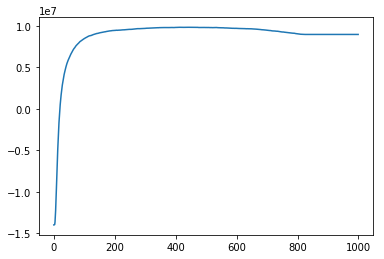

In [7]:
import matplotlib.pyplot as plt

table = [cost_threshold(n/1000) for n in range(0,1000)]
plt.plot(table)

max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu avec un seuil de {max_threshold}')